<a href="https://colab.research.google.com/github/sp-au-mu-nl/MediaDataProgramming/blob/main/intro_numpy/answer/intro_numpy_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プロジェクト・恒星運動II

In [1]:
import dill
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!wget https://github.com/sp-au-mu-nl/MediaDataProgramming/raw/refs/heads/main/intro_numpy/data/starData.pkl

--2025-08-26 13:23:53--  https://github.com/sp-au-mu-nl/MediaDataProgramming/raw/refs/heads/main/intro_numpy/data/starData.pkl
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/MediaDataProgramming/refs/heads/main/intro_numpy/data/starData.pkl [following]
--2025-08-26 13:23:53--  https://raw.githubusercontent.com/sp-au-mu-nl/MediaDataProgramming/refs/heads/main/intro_numpy/data/starData.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88486 (86K) [application/octet-stream]
Saving to: ‘starData.pkl’

starData.pkl        100%[===================>]  86.41K  --.-KB/s    in 0.1s    

2

In [3]:
dill.load_session('starData.pkl')
spectra = spectra[:,:7]
starnames = np.array([
  'HD  30584',
  'HD  10032',
  'HD  64191',
  'HD   5211',
  'HD  56030',
  'HD  94028',
  'SAO102986',
])

In [4]:
nObs = spectra.shape[0]
lambdaStart = 630.02
lambdaDelta = 0.14
lambdaEnd = lambdaStart + (nObs-1)*lambdaDelta
lambdaV = np.arange(lambdaStart, lambdaEnd, lambdaDelta)

sHa = np.min(spectra[:,1])
idx = np.argmin(spectra[:,1])
lambdaHa = lambdaV[idx]
z = (lambdaHa/656.28)-1
speed = z * 299792.458

上記のスクリプトの 7,8 行目では、行列 spectra 内にある 2 番目の星のスペクトル データが抽出されます。その後、9 行目から 11 行目で、そのデータをもとに速度を計算します。spectra 内の "すべての" 星の速度を計算するにはどうすればよいでしょうか?

for ループで計算を繰り返すこともできますが、代わりに配列演算を使用するほうがより効率的です。

スクリプトの 7,8 行目を変更します。[:,1] を削除すると、すべての星の速度を計算できます。

In [5]:
sHa = np.min(spectra,axis=0)
idx = np.argmin(spectra,axis=0)
lambdaHa = lambdaV[idx]
z = (lambdaHa/656.28)-1
speed = z * 299792.458

speed がベクトルになっていることに注意してください。正の速度は星が遠ざかっていること (赤方偏移スペクトル) を意味し、負の速度は星が近付いていること (青方偏移スペクトル) を意味します。

この後のいくつかのタスクでは、7 つの星をすべて含むプロットを作成します。赤方偏移スペクトルと青方偏移スペクトルでは、使用するスタイルが異なります。plot コマンドはすべての星で同じではないため、for ループを使用すると便利です。

c というループ インデックスを指定して for ループを作成します。ループ インデックスは、spectra のすべての列 (1 から 7) を順に辿る必要があります。

ループ本体では、spectra の c 列目を s という変数に抽出します。徐々にループ本体を作ります。

In [6]:
for c in range(spectra.shape[1]):
    s = spectra[:,c]

まず、破線を使用して青方偏移スペクトルをプロットします。

for ループ本体に if ステートメントを追加します。speed(c) が 0 以下の場合は、破線 (--) を使用して、lambda に対する s の loglog プロットを作成します。

for ループの間、連続してプロットすることで、プロットが 1 つだけ作成されるようにします。

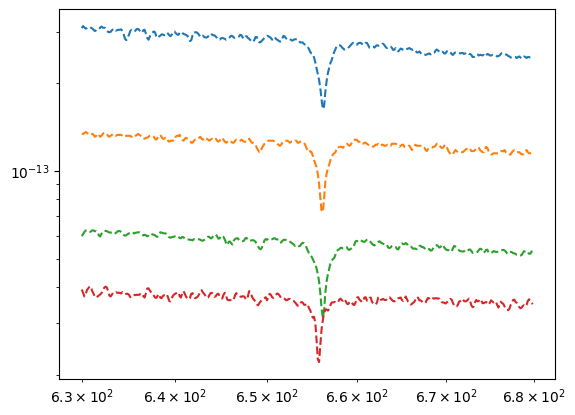

In [7]:
for c in range(spectra.shape[1]):
  if speed[c] <= 0:
    s = spectra[:,c]
    plt.loglog(lambdaV, s, '--')

太線を使用して赤方偏移スペクトルをプロットします。

else ステートメントを追加します。speed(c) が 0 より大きい場合は、3 のライン幅を使用して、lambda に対する s の loglog プロットを作成します。

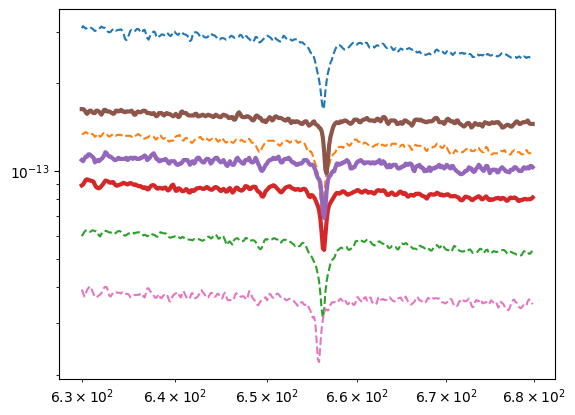

In [8]:
for c in range(spectra.shape[1]):
  sp = speed[c]
  s = spectra[:,c]
  if sp <= 0:
    plt.loglog(lambdaV, s, '--')
  else:
    plt.loglog(lambdaV, s, lw=3)

string 配列を関数 legend に直接渡すことができます。

string 配列 starnames には、spectra 内のそれぞれの星の名前が含まれています。

配列 starnames を使用して、プロットに凡例を追加します。

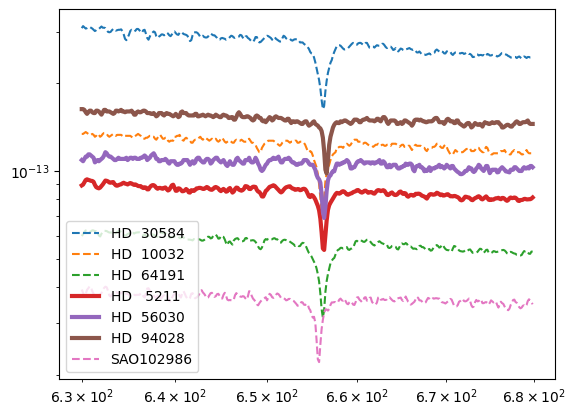

In [9]:
for c in range(spectra.shape[1]):
  sp = speed[c]
  s = spectra[:,c]
  if sp <= 0:
    plt.loglog(lambdaV, s, '--')
  else:
    plt.loglog(lambdaV, s, lw=3)
plt.legend(starnames)

プロット内で、ライン スタイルを使用して赤方偏移スペクトルをもつ星を識別し、凡例でその名前を確認することができます。for ループ "なし" で赤方偏移スペクトルの名前を特定できますか?

論理インデックスを使用して条件と一致する要素を見つけられることを思い出してください。
```
c = b(a < 6)
```
starnames 内の要素のうち、speed が 0 より大きいものを含む変数 movaway を作成します。

In [10]:
movaway = starnames[speed>0]